# Salary Predictions Based on Job Descriptions

# Part 1 - DEFINE

### ---- 1 Define the problem ----

Given a dataset with 1 million job postings, the task at hand is to build and train a model with the given dataset, and then make predictions about new job postings (another 1 million records). This note books contains the processes of accessing the data for quality and tidyness, data cleaning, data exploration and predictive modelling.  

In [1]:
#import libraries
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.mode.chained_assignment = None

#personal info
__author__ = "Abah Linson Igoche"
__email__ = "abahigoche@gmail.com"

## Part 2 - DISCOVER

### ---- 2 Load the data ----

In [2]:
#load the data into a Pandas dataframe
train_features = pd.read_csv('./data/train_features.csv')
test_features = pd.read_csv('./data/test_features.csv')
train_salaries = pd.read_csv('./data/train_salaries.csv')

In [3]:
train_features.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16


In [4]:
test_features.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362685407687,COMP33,MANAGER,HIGH_SCHOOL,NONE,HEALTH,22,73
1,JOB1362685407688,COMP13,JUNIOR,NONE,NONE,AUTO,20,47
2,JOB1362685407689,COMP10,CTO,MASTERS,BIOLOGY,HEALTH,17,9
3,JOB1362685407690,COMP21,MANAGER,HIGH_SCHOOL,NONE,OIL,14,96
4,JOB1362685407691,COMP36,JUNIOR,DOCTORAL,BIOLOGY,OIL,10,44


In [5]:
train_salaries.head()

,jobId,salary
0,JOB1362684407687,130
1,JOB1362684407688,101
2,JOB1362684407689,137
3,JOB1362684407690,142
4,JOB1362684407691,163


In [6]:
train_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
jobId                  1000000 non-null object
companyId              1000000 non-null object
jobType                1000000 non-null object
degree                 1000000 non-null object
major                  1000000 non-null object
industry               1000000 non-null object
yearsExperience        1000000 non-null int64
milesFromMetropolis    1000000 non-null int64
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


In [7]:
test_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
jobId                  1000000 non-null object
companyId              1000000 non-null object
jobType                1000000 non-null object
degree                 1000000 non-null object
major                  1000000 non-null object
industry               1000000 non-null object
yearsExperience        1000000 non-null int64
milesFromMetropolis    1000000 non-null int64
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


In [8]:
train_salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 2 columns):
jobId     1000000 non-null object
salary    1000000 non-null int64
dtypes: int64(1), object(1)
memory usage: 15.3+ MB


In [9]:
train_features.describe()

,yearsExperience,milesFromMetropolis
count,1000000.000000,1000000.000000
mean,11.992386,49.529260
std,7.212391,28.877733
min,0.000000,0.000000
25%,6.000000,25.000000
50%,12.000000,50.000000
75%,18.000000,75.000000
max,24.000000,99.000000


In [10]:
test_features.describe()

,yearsExperience,milesFromMetropolis
count,1000000.000000,1000000.000000
mean,12.002104,49.526414
std,7.213179,28.889713
min,0.000000,0.000000
25%,6.000000,25.000000
50%,12.000000,50.000000
75%,18.000000,75.000000
max,24.000000,99.000000


In [11]:
train_salaries.describe()

,salary
count,1000000.000000
mean,116.061818
std,38.717936
min,0.000000
25%,88.000000
50%,114.000000
75%,141.000000
max,301.000000


### ---- 3 Clean the data ----

In [12]:
#look for duplicate data, invalid data (e.g. salaries <=0), or corrupt data and remove it
#merge train_features and salaries
train_df = pd.merge(left=train_features, right=train_salaries, how='inner',on='jobId')

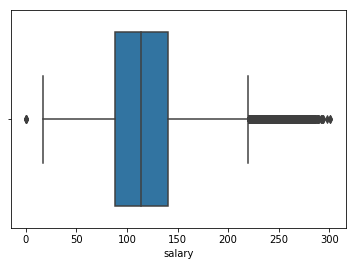

In [13]:
#drop duplicates
train_df = train_df.drop_duplicates()
sns.boxplot(train_df.salary);

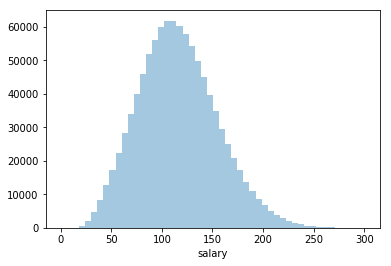

In [14]:
sns.distplot(train_df.salary, kde=False);

In [19]:
def boundaries(df, col):
    q1 = df[col].quantile(.25)              # first quantile 
    q3 = train_df[col].quantile(.75)        # third quantile
    iqr = q3 - q1                           # inter-quantile range
    upper_bound = q3 + 1.5 * iqr            # upper boundary
    lower_bound = q1 - 1.5 * iqr            # lower boundary)
    return lower_bound, upper_bound

lower_bound, upper_bound = boundaries(train_df, 'salary')
lower_bound, upper_bound

(8.5, 220.5)

In [20]:
lower_bound_df = train_df[train_df.salary <= lower_bound]
lower_bound_df

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
30559,JOB1362684438246,COMP44,JUNIOR,DOCTORAL,MATH,AUTO,11,7,0
495984,JOB1362684903671,COMP34,JUNIOR,NONE,NONE,OIL,1,25,0
652076,JOB1362685059763,COMP25,CTO,HIGH_SCHOOL,NONE,AUTO,6,60,0
816129,JOB1362685223816,COMP42,MANAGER,DOCTORAL,ENGINEERING,FINANCE,18,6,0
828156,JOB1362685235843,COMP40,VICE_PRESIDENT,MASTERS,ENGINEERING,WEB,3,29,0


In [21]:
upper_bound_df = train_df[train_df.salary > upper_bound]
upper_bound_df.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
266,JOB1362684407953,COMP30,CEO,MASTERS,BIOLOGY,OIL,23,60,223
362,JOB1362684408049,COMP38,CTO,MASTERS,NONE,HEALTH,24,3,223
560,JOB1362684408247,COMP53,CEO,MASTERS,BIOLOGY,WEB,22,7,248
670,JOB1362684408357,COMP26,CEO,MASTERS,MATH,AUTO,23,9,240
719,JOB1362684408406,COMP54,VICE_PRESIDENT,DOCTORAL,BIOLOGY,OIL,21,14,225


In [22]:
upper_bound_df.jobType.unique().tolist()

['CEO', 'CTO', 'VICE_PRESIDENT', 'CFO', 'JUNIOR', 'MANAGER', 'SENIOR']

In [23]:
train_df.query('salary > 220.5 and jobType == "JUNIOR"').industry.unique().tolist()

['OIL', 'FINANCE', 'WEB']

In [188]:
clean_train_df = train_df[train_df.salary > lower_bound]

In [189]:
categorical_vars = clean_train_df.columns.tolist()[1:-2]
def to_category(df, col):
    return df[col].astype('category')

In [190]:
for col in categorical_vars:
    clean_train_df[col] = to_category(clean_train_df, col)

### ---- 4 Explore the data (EDA) ----

In [173]:
#summarize each feature variable
#summarize the target variable
#look for correlation between each feature and the target
#look for correlation between features

In [174]:
mean=clean_train_df.groupby('jobType')['salary'].median()
levels = mean.sort_values().index.tolist()

In [271]:
def make_plot(df, numeric_cols=None, categorical_cols=None, boxplot=False,
              group_by_value=None, stacked_bar=False, col1=None, col2=None):
    new_df = df.copy()
    if numeric_cols is not None:
        for col in numeric_cols:
            new_df[col].value_counts().sort_values().plot()
            plt.show()
          
    if categorical_cols is not None:
        for col in categorical_cols:
            fig = plt.subplots(figsize=(14, 6))
            mean = new_df.groupby(col)[group_by_value].median().sort_values()
            levels = mean.index.tolist()
            new_df[col].cat.reorder_categories(levels, inplace=True)
            plt.subplot(1,2,1)
            mean.plot.bar()
            plt.ylabel(group_by_value + " (median)", fontsize=14)
            plt.title('Salary by ' + col)
            
            if boxplot ==True:
                df2 = df.copy()
                plt.subplot(1,2,2)
                sns.boxplot(x=col, y=group_by_value, data=df2, fliersize=0.2)
                sns.stripplot(x=col, y=group_by_value, data=df2, jitter=True, size=0.1, color='orange', alpha=0.8, marker='o')
                plt.xticks(rotation=45)
                plt.ylabel('Salary', fontsize=14)
                plt.title('Distibution of Salaray by ' + col, fontsize=14)
    
    if stacked_bar == True:
        crosstab = pd.crosstab(index=df[col1], columns=df[col2])
        plt.figure(figsize=(10,8))
        crosstab.plot.bar(stacked=True)
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
        plt.ylabel('Count', fontsize=14)
        plt.show();
        

def plot_levels(df, categorical_col, hist_=None, kde_=None):
    """plots a the distribution of given categorical variable
    and provides a summary statistic
    """
    col_values = df[categorical_col].unique().tolist()
    targets = [df.loc[df[categorical_col] == col_value] for col_value in col_values]
    plt.figure(figsize=(10,8))
    for target in targets:
        sns.distplot(target[['salary']], bins=500, hist=hist_, kde=kde_, kde_kws={'linewidth':5, 'alpha':.8}, label=target[categorical_col].unique().tolist())
    if hist_ == True:
        plt.ylabel('Count', fontdict={'size':14})
    else:
        plt.ylabel('Density', fontdict={'size':14})
    plt.xlabel('Salary', fontdict={'size':14})
    plt.title('Distribution of '+ categorical_col)
    plt.legend()
    plt.show()
    
    summary_table = df.groupby(categorical_col)['salary'].agg(['mean', 'median', 'max', 'min', 'std'])
    summary_table.columns = ['mean salary', 'median salary', 'max salary', 'min salary', 'standard deviation']
    summary_table = summary_table.sort_values('mean salary')
    return summary_table

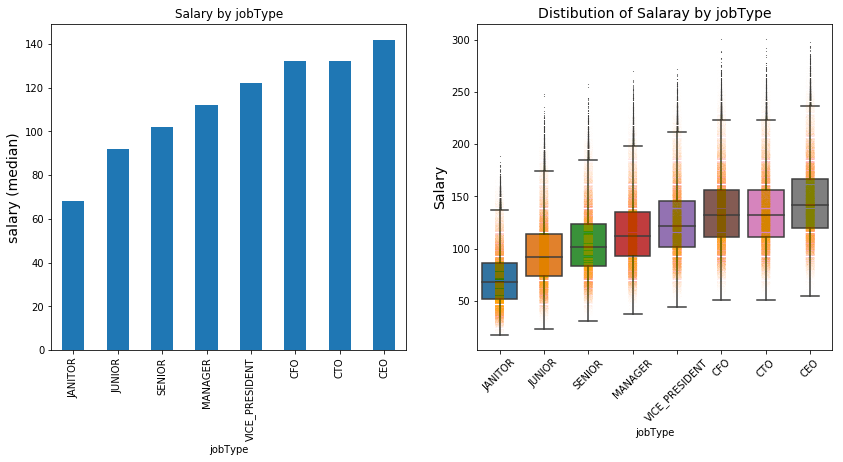

In [176]:
make_plot(df=clean_train_df, categorical_cols=['jobType'], group_by_value='salary', boxplot=True)

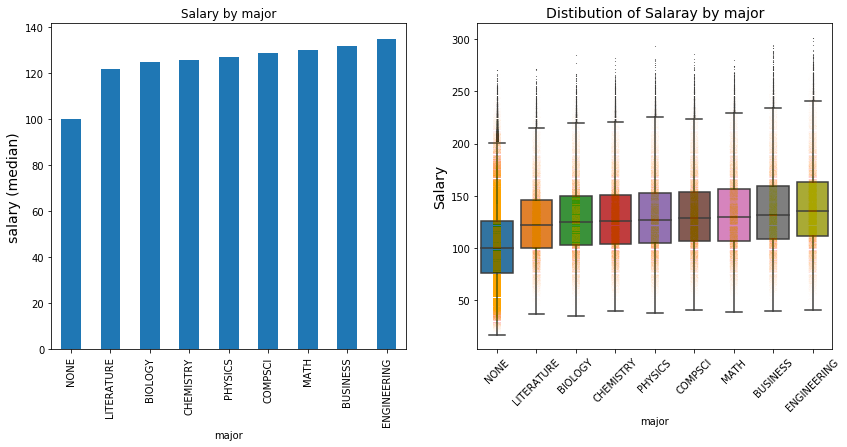

In [66]:
make_plot(df=clean_train_df, categorical_cols=['major'], group_by_value='salary', boxplot=True)

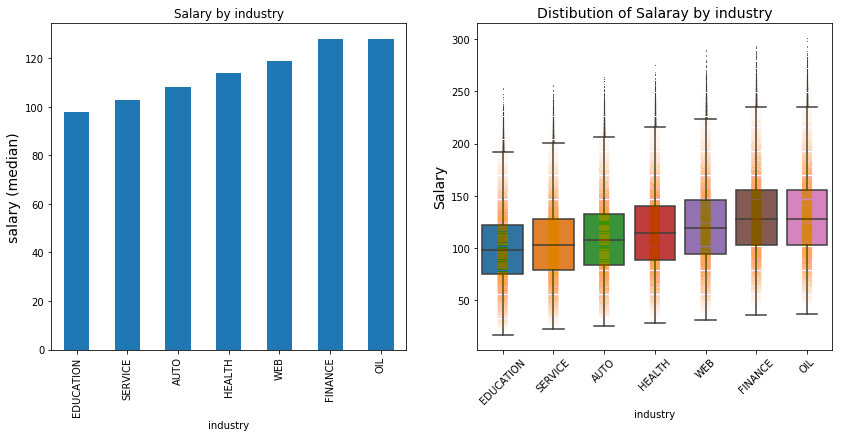

In [67]:
make_plot(df=clean_train_df, categorical_cols=['industry'], group_by_value='salary', boxplot=True)

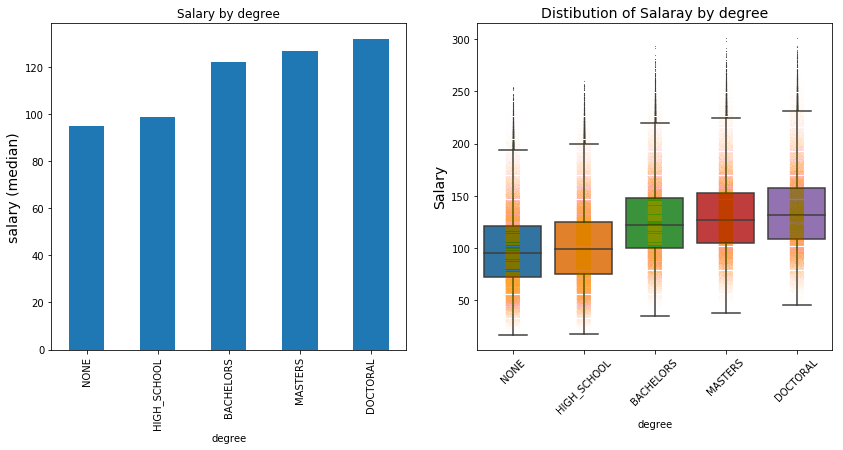

In [68]:
make_plot(df=clean_train_df, categorical_cols=['degree'], group_by_value='salary', boxplot=True)

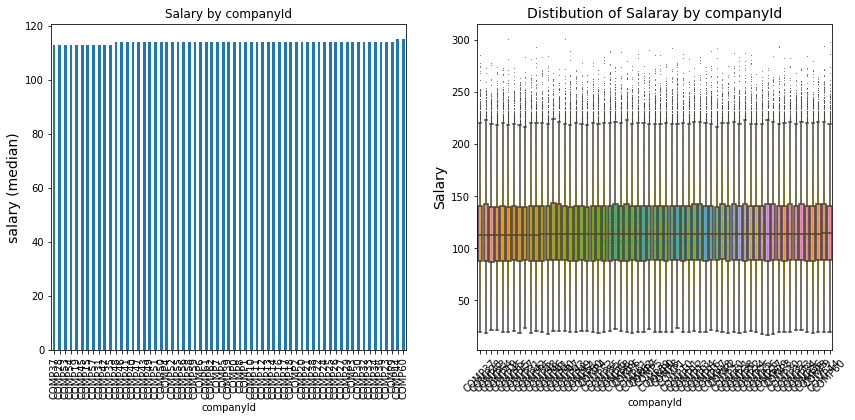

In [178]:
make_plot(df=clean_train_df, categorical_cols=['companyId'], group_by_value='salary', boxplot=True)

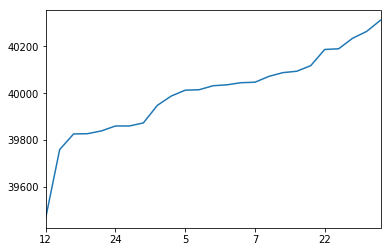

In [207]:
make_plot(df=clean_train_df, numeric_cols=['yearsExperience'])

In [226]:
clean_train_df['milesRange'] = pd.cut(clean_train_df.milesFromMetropolis, 11, right=False)

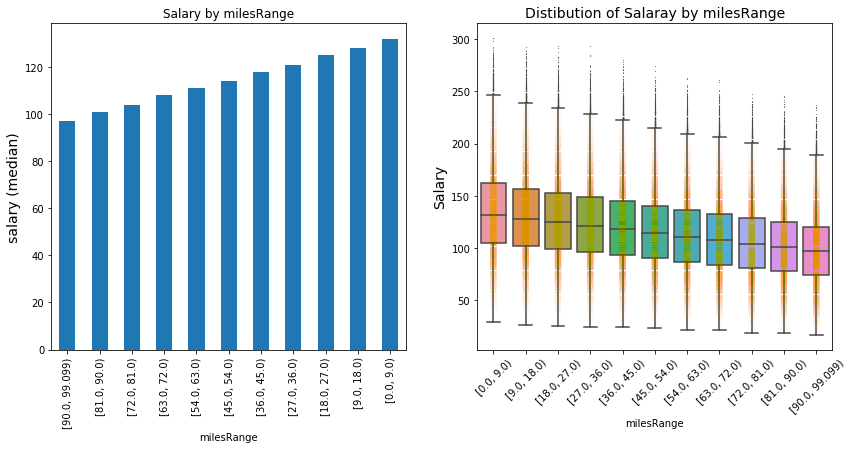

In [228]:
make_plot(df=clean_train_df, categorical_cols=['milesRange'], group_by_value='salary', boxplot=True)

<Figure size 720x576 with 0 Axes>

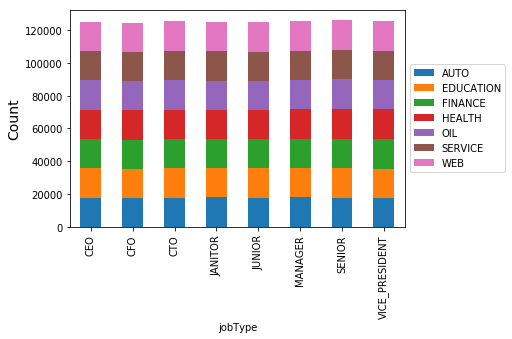

In [239]:
make_plot(df=clean_train_df, stacked_bar=True, col1='jobType', col2='industry')

<Figure size 720x576 with 0 Axes>

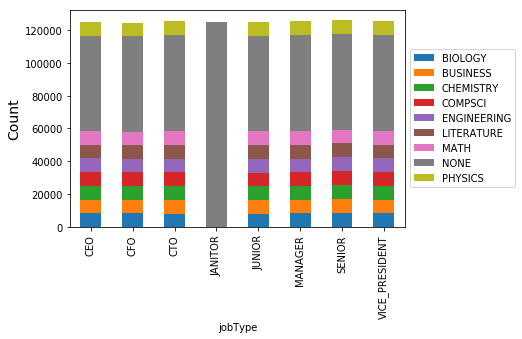

In [240]:
make_plot(df=clean_train_df, stacked_bar=True, col1='jobType', col2='major')

<Figure size 720x576 with 0 Axes>

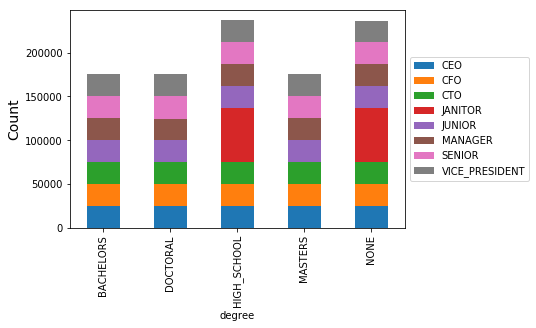

In [241]:
make_plot(df=clean_train_df, stacked_bar=True, col1='degree', col2='jobType')

<Figure size 720x576 with 0 Axes>

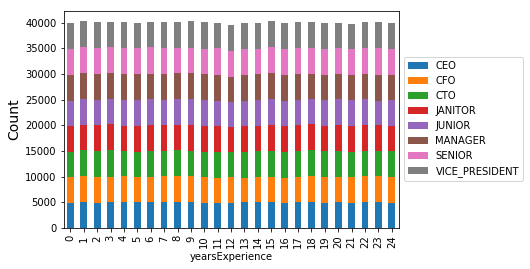

In [242]:
make_plot(df=clean_train_df, stacked_bar=True, col1='yearsExperience', col2='jobType')

<Figure size 720x576 with 0 Axes>

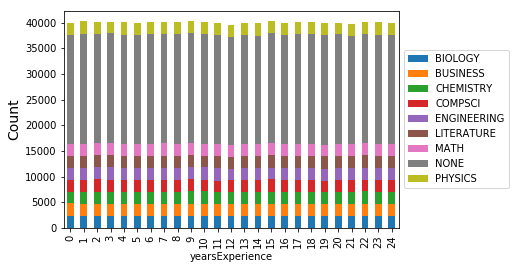

In [243]:
make_plot(df=clean_train_df, stacked_bar=True, col1='yearsExperience', col2='major')

In [262]:
#clean_train_df['yr_of_exp_range'] = pd.cut(clean_train_df.yearsExperience, 6, right=False)

In [110]:
#clean_train_df.groupby('yr_of_exp_range')['salary'].agg(['mean', 'median']).plot.bar()
#plt.xticks(rotation=25);

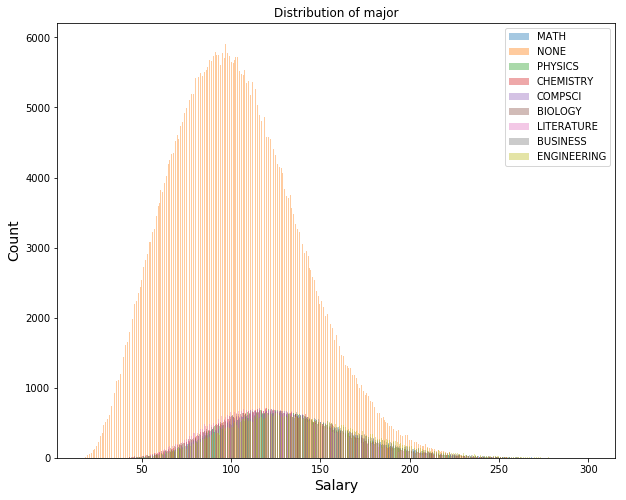

,mean salary,median salary,max salary,min salary,standard deviation
major,,,,,
NONE,102.583864,100,270,17,36.136268
LITERATURE,124.423097,122,271,37,33.576413
BIOLOGY,127.932664,125,285,35,34.820141
CHEMISTRY,129.072085,126,282,40,34.832396
PHYSICS,130.372436,127,293,38,34.956981
COMPSCI,132.075605,129,286,41,34.776640
MATH,133.322042,130,280,39,35.539246
BUSINESS,135.648980,132,294,40,37.006526
ENGINEERING,138.441342,135,301,41,38.178934


In [260]:
plot_levels(df=clean_train_df, categorical_col='major', hist_=True)

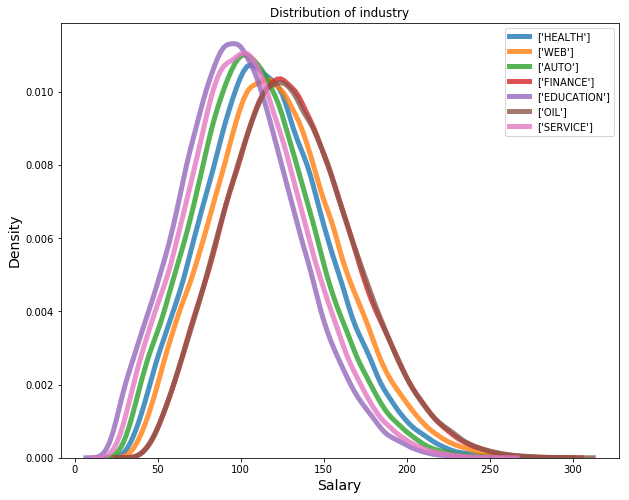

,mean salary,median salary,max salary,min salary,standard deviation
industry,,,,,
EDUCATION,99.448386,98,253,17,35.110257
SERVICE,104.446820,103,256,22,35.577606
AUTO,109.435222,108,264,25,36.091590
HEALTH,115.735540,114,275,28,36.865179
WEB,121.645362,119,290,31,38.165659
FINANCE,130.747659,128,294,36,38.319820
OIL,130.953863,128,301,37,38.528558


In [277]:
plot_levels(df=clean_train_df, categorical_col='industry', hist_=False, kde_=True)

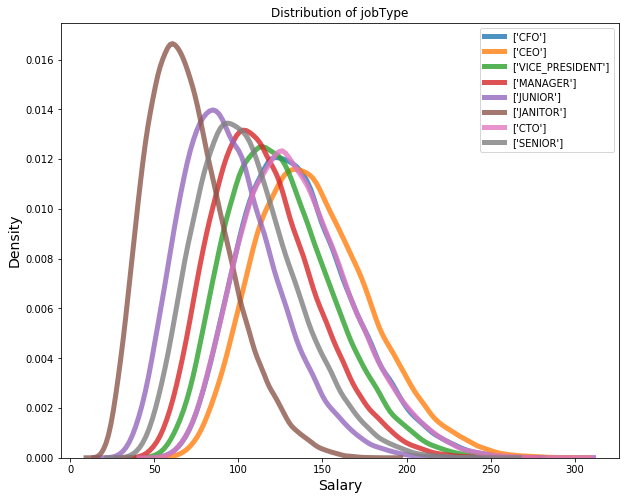

,mean salary,median salary,max salary,min salary,standard deviation
jobType,,,,,
JANITOR,70.813045,68,189,17,24.643021
JUNIOR,95.333087,92,248,23,29.246759
SENIOR,105.487775,102,258,31,30.069722
MANAGER,115.368518,112,270,37,30.833865
VICE_PRESIDENT,125.368630,122,272,44,31.956295
CFO,135.458547,132,301,51,33.069203
CTO,135.481067,132,301,51,33.090947
CEO,145.311425,142,298,55,34.423846


In [278]:
plot_levels(df=clean_train_df, categorical_col='jobType', hist_=False, kde_=True)

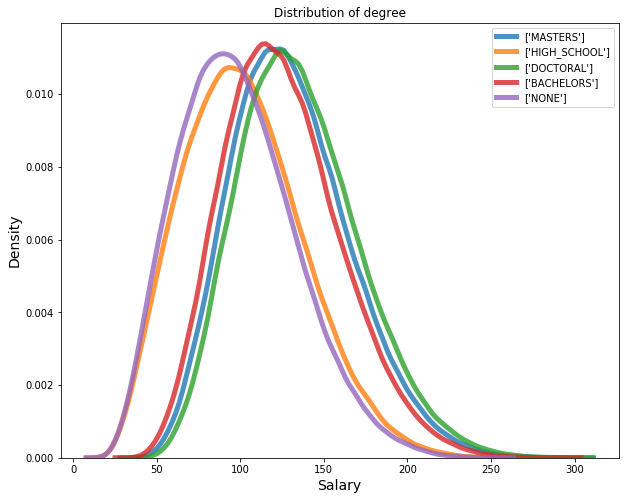

,mean salary,median salary,max salary,min salary,standard deviation
degree,,,,,
NONE,98.176882,95,254,17,34.915141
HIGH_SCHOOL,101.921085,99,260,18,36.112684
BACHELORS,125.454663,122,294,35,35.042720
MASTERS,130.505647,127,301,38,35.399830
DOCTORAL,135.490979,132,301,45,35.790555


In [279]:
plot_levels(df=clean_train_df, categorical_col='degree', hist_=False, kde_=True)

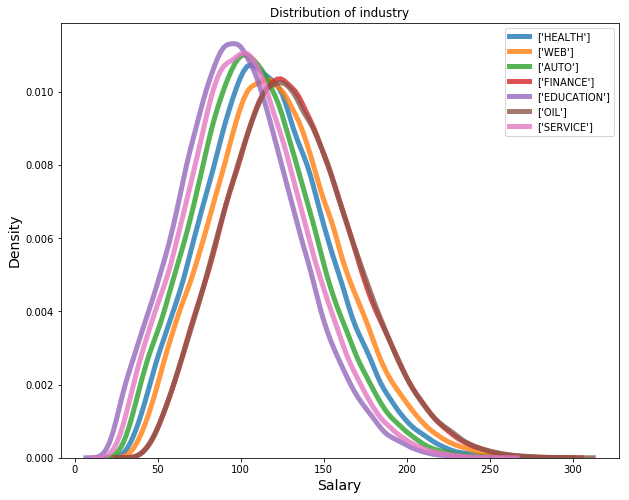

,mean salary,median salary,max salary,min salary,standard deviation
industry,,,,,
EDUCATION,99.448386,98,253,17,35.110257
SERVICE,104.446820,103,256,22,35.577606
AUTO,109.435222,108,264,25,36.091590
HEALTH,115.735540,114,275,28,36.865179
WEB,121.645362,119,290,31,38.165659
FINANCE,130.747659,128,294,36,38.319820
OIL,130.953863,128,301,37,38.528558


In [280]:
plot_levels(df=clean_train_df, categorical_col='industry', hist_=False, kde_=True)

In [328]:
from sklearn.preprocessing import StandardScaler

In [326]:
clean_train_df.

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary,milesRange
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130,"[81.0, 90.0)"
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101,"[72.0, 81.0)"
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137,"[36.0, 45.0)"
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142,"[9.0, 18.0)"
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163,"[9.0, 18.0)"


### ---- 5 Establish a baseline ----

In [304]:
industry = clean_train_df.groupby('industry')['salary'].mean().to_frame()
industry['industry'] = industry.index
industry = pd.get_dummies(industry, 'industry')
industry.salary = round(industry.salary,2)

In [307]:
y = industry['salary']

In [318]:
X=industry.iloc[:, 1:]

In [319]:
# persistence model
def model_persistence(x):
    return x

In [321]:
from sklearn.model_selection import cross_val_score

In [324]:
from sklearn.dummy import DummyRegressor

In [325]:
dummy = DummyRegressor(strategy='mean')

In [5]:
#select a reasonable metric (MSE in this case)
#create an extremely simple model and measure its efficacy
#e.g. use "average salary" for each industry as your model and then measure MSE
#during 5-fold cross-validation
train_avg_salary = y_train) / len(self.y_train)
test_avg_salary = sum(self.y_test) / len(self.y_test)
(([train_avg_salary] * len(self.y_train)), ([test_avg_salary] * len(self.y_test)))

### ---- 6 Hypothesize solution ----

In [ ]:
#brainstorm 3 models that you think may improve results over the baseline model based
#on your 

Brainstorm 3 models that you think may improve results over the baseline model based on your EDA and explain why they're reasonable solutions here.

Also write down any new features that you think you should try adding to the model based on your EDA, e.g. interaction variables, summary statistics for each group, etc

## Part 3 - DEVELOP

You will cycle through creating features, tuning models, and training/validing models (steps 7-9) until you've reached your efficacy goal

#### Your metric will be MSE and your goal is:
 - <360 for entry-level data science roles
 - <320 for senior data science roles

### ---- 7 Engineer features  ----

In [ ]:
#make sure that data is ready for modeling
#create any new features needed to potentially enhance model

### ---- 8 Create models ----

In [15]:
#create and tune the models that you brainstormed during part 2

### ---- 9 Test models ----

In [1]:
#do 5-fold cross validation on models and measure MSE

### ---- 10 Select best model  ----

In [ ]:
#select the model with the lowest error as your "prodcuction" model

## Part 4 - DEPLOY

### ---- 11 Automate pipeline ----

In [ ]:
#write script that trains model on entire training set, saves model to disk,
#and scores the "test" dataset

### ---- 12 Deploy solution ----

In [16]:
#save your prediction to a csv file or optionally save them as a table in a SQL database
#additionally, you want to save a visualization and summary of your prediction and feature importances
#these visualizations and summaries will be extremely useful to business stakeholders

### ---- 13 Measure efficacy ----

We'll skip this step since we don't have the outcomes for the test data